# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'NZDUSD'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

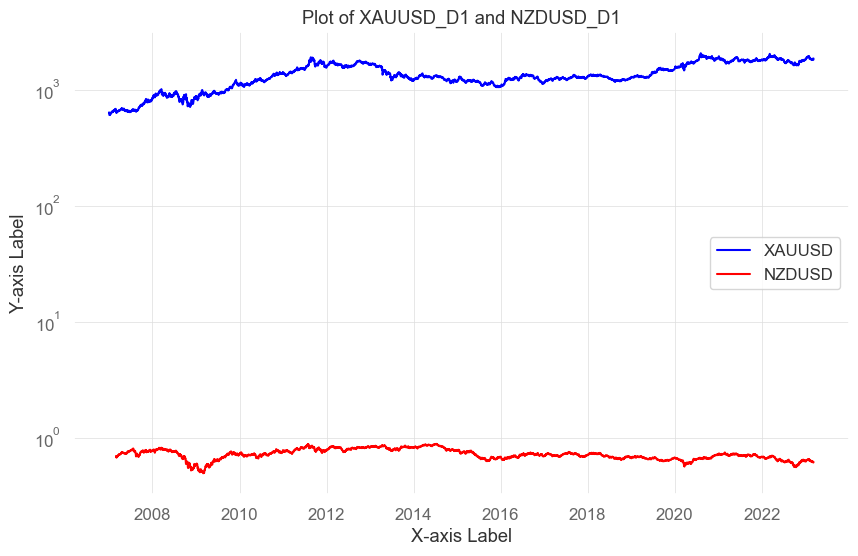

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          7.402e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:14:44   Log-Likelihood:                         -36375.
No. Observations:                5000   AIC:                                  7.275e+04
Df Residuals:                    4999   BIC:                                  7.276e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1860.1968      6.837    272.071      0.000    1846.793    1873.601
==============================================================================
Omnibus:                       71.119   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.203
Skew:                           0.199   Prob(JB):                     1.39e-13
Kurtosis:                       2.646   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run()

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.908831
Multiple (Buy-and-Hold):     3.702283
--------------------------------------
Out-/Underperformance:       -2.793452


CAGR:                        -0.005961
Annualized Mean:             -0.005979
Annualized Std:              0.023675
Sharpe Ratio:                -0.252541
Sortino Ratio:               -0.341153
Maximum Drawdown:            0.151473
Calmar Ratio:                -0.039353
Max Drawdown Duration:       5718 Days
Kelly Criterion:             -10.177045


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.52%
CAGR﹪                     -0.43%

Sharpe                     -0.23
Prob. Sharpe Ratio         15.52%
Smart Sharpe               -0.23
Sortino                    -0.31
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -15.39%
Longest DD Days            5718
Volatility (ann.)          2.13%
Calmar                     -0.03
Skew                       -0.7
Kurtosis                   9.17

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.59%
Kelly Criterion            -2.21%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-06,2019-06-19,2023-03-01,5718,-15.391074,-14.845743
2,2007-05-02,2007-05-06,2007-05-13,12,-0.188658,-0.179670
3,2007-06-10,2007-06-17,2007-06-25,16,-0.175743,-0.174155
4,2007-04-03,2007-04-06,2007-04-18,16,-0.125676,-0.117960
5,2007-03-25,2007-03-28,2007-04-01,8,-0.085134,-0.048084


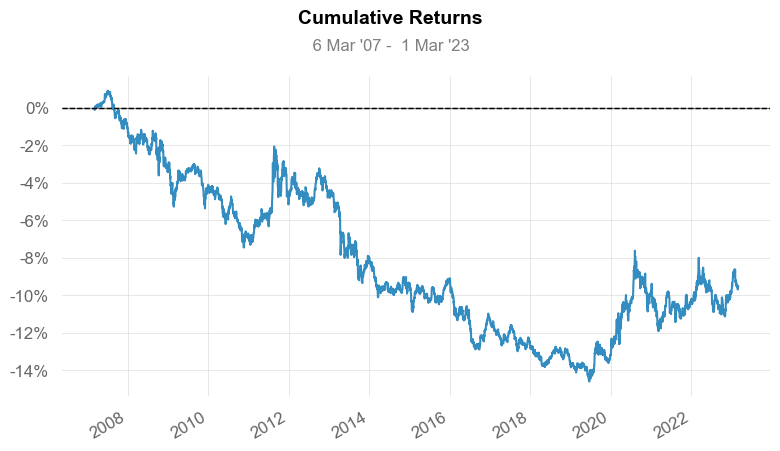

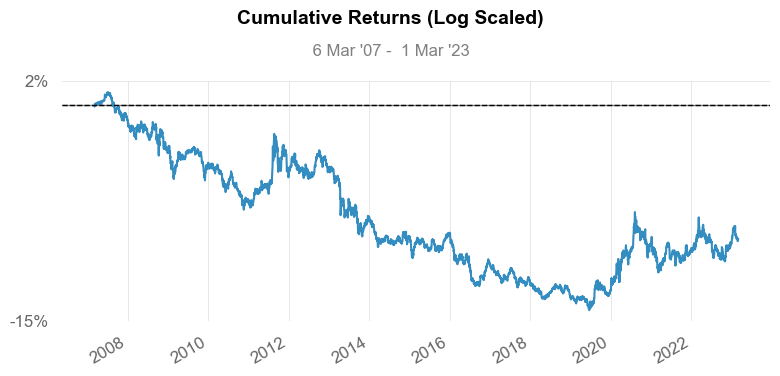

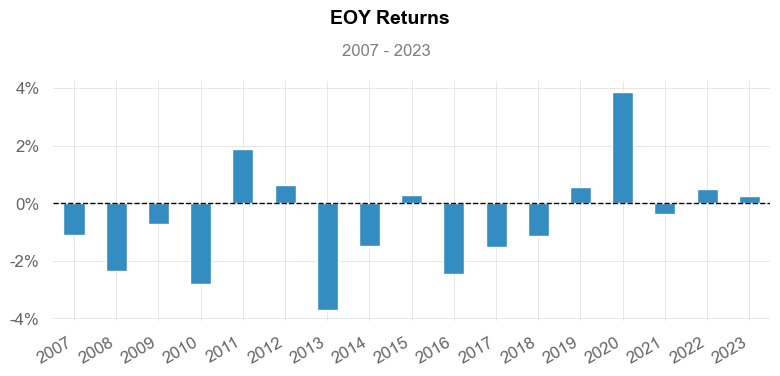

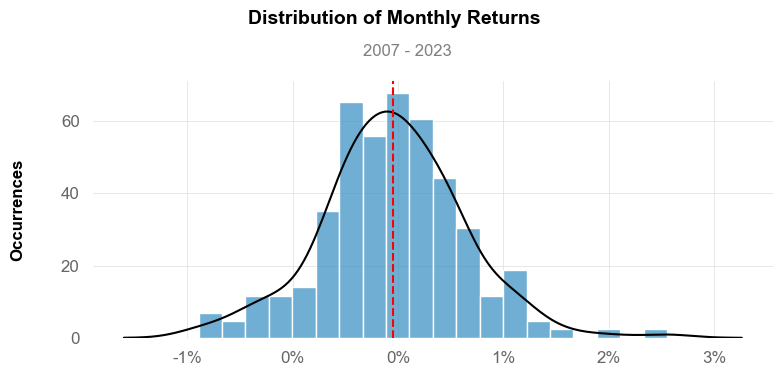

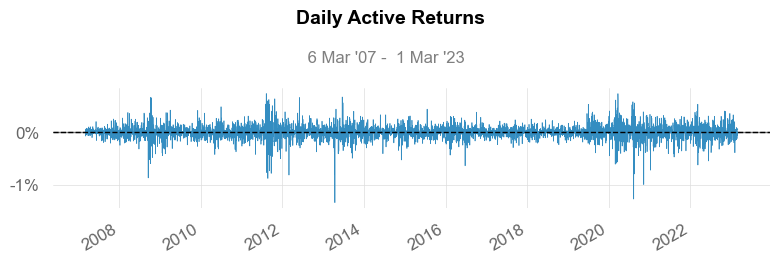

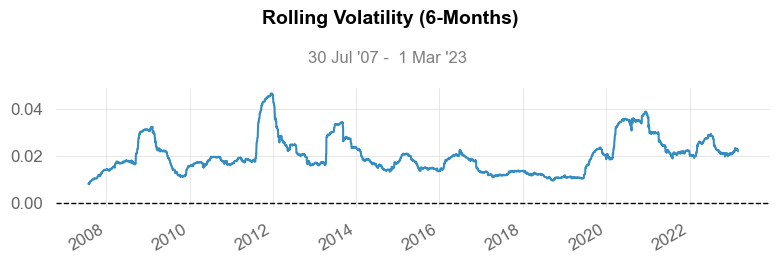

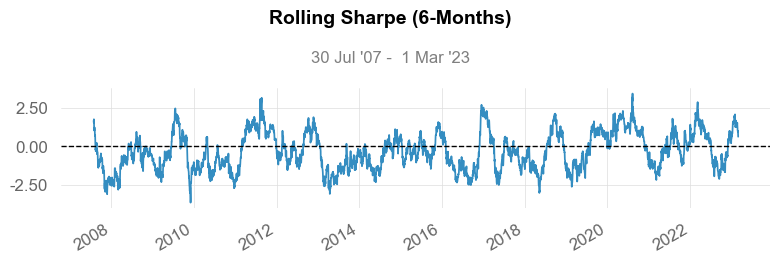

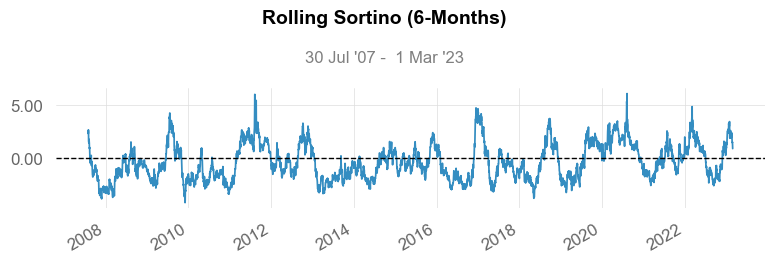

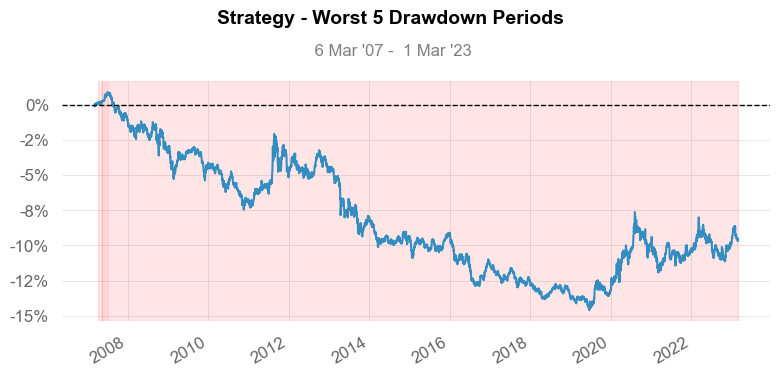

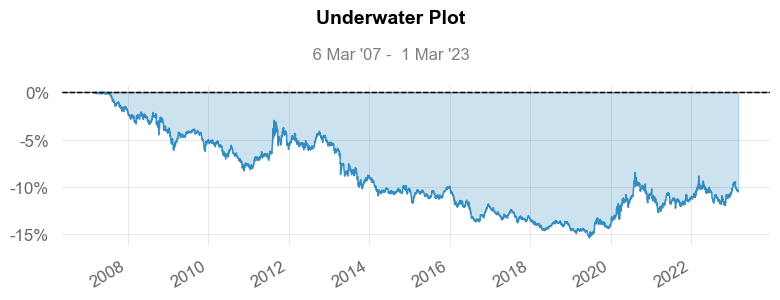

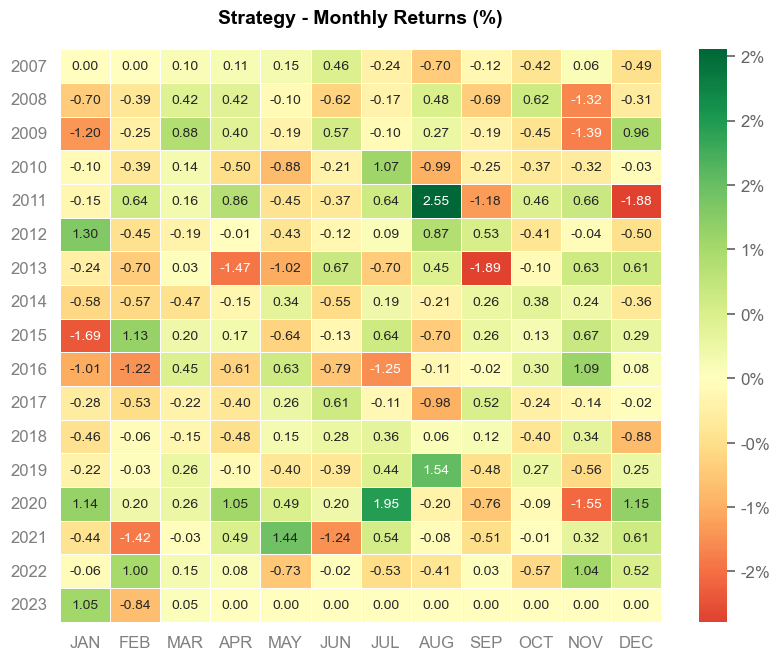

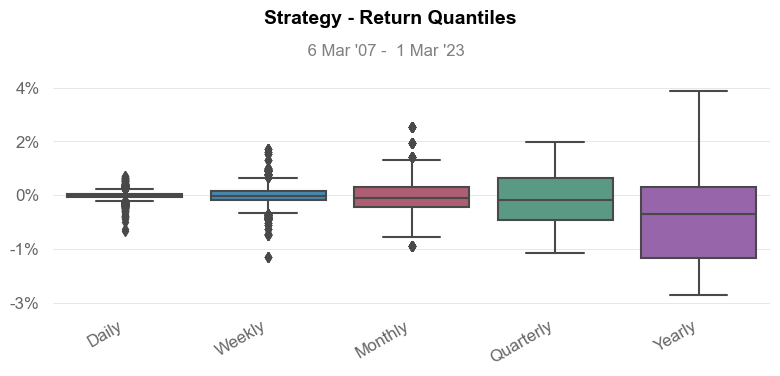

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

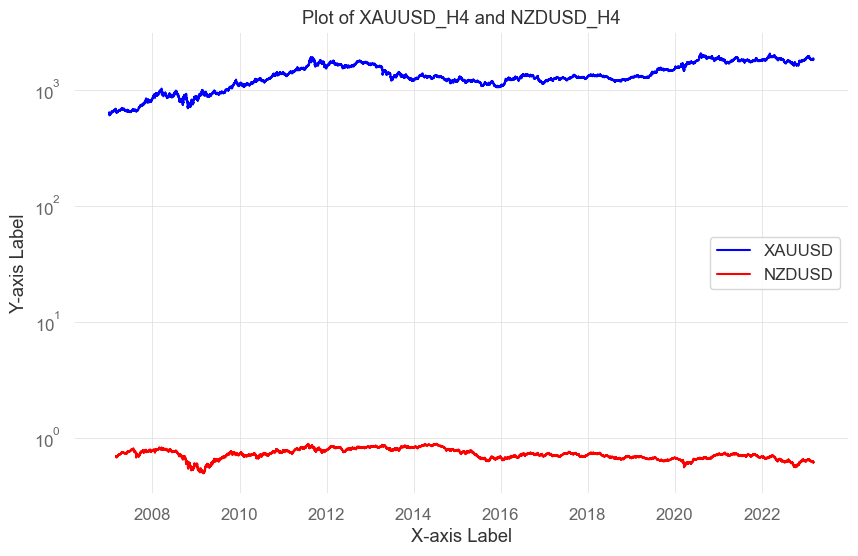

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          3.815e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:15:13   Log-Likelihood:                     -1.8768e+05
No. Observations:               25797   AIC:                                  3.754e+05
Df Residuals:                   25796   BIC:                                  3.754e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1859.7667      3.011    617.638      0.000    1853.865    1865.669
==============================================================================
Omnibus:                      370.242   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.410
Skew:                           0.198   Prob(JB):                     4.80e-67
Kurtosis:                       2.644   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run()

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.913101
Multiple (Buy-and-Hold):     3.645316
--------------------------------------
Out-/Underperformance:       -2.732215


CAGR:                        -0.00567
Annualized Mean:             -0.005686
Annualized Std:              0.023509
Sharpe Ratio:                -0.241854
Sortino Ratio:               -0.333672
Maximum Drawdown:            0.147324
Calmar Ratio:                -0.038484
Max Drawdown Duration:       5717 Days
Kelly Criterion:             -9.791012


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.08%
CAGR﹪                     -0.41%

Sharpe                     -0.22
Prob. Sharpe Ratio         16.71%
Smart Sharpe               -0.22
Sortino                    -0.29
Smart Sortino              -0.29
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.95%
Longest DD Days            5718
Volatility (ann.)          2.12%
Calmar                     -0.03
Skew                       -0.7
Kurtosis                   9.25

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.56%
Kelly Criterion            -2.1%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-06,2019-06-19,2023-03-01,5718,-14.953123,-14.299150
2,2007-05-02,2007-05-06,2007-05-13,12,-0.188682,-0.179693
3,2007-06-10,2007-06-17,2007-06-25,16,-0.175765,-0.174177
4,2007-04-03,2007-04-06,2007-04-18,16,-0.125692,-0.117975
5,2007-03-25,2007-03-28,2007-04-01,8,-0.085145,-0.048091


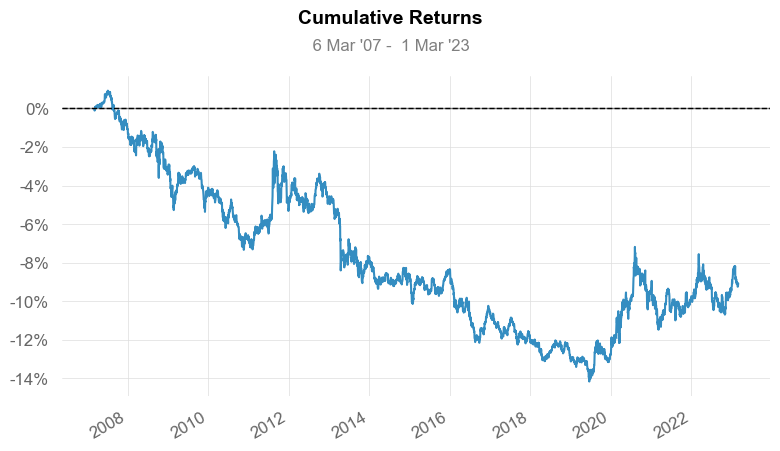

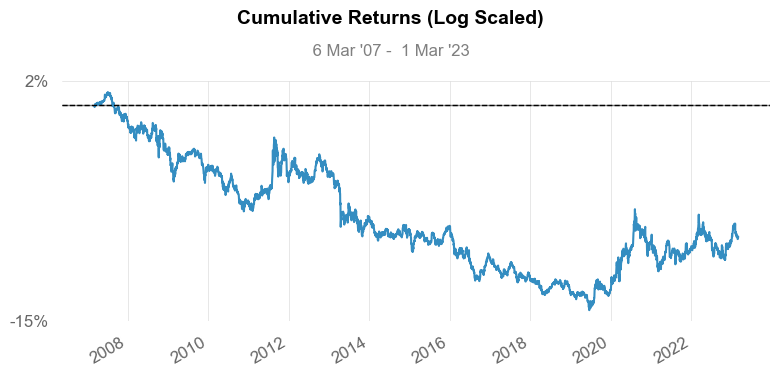

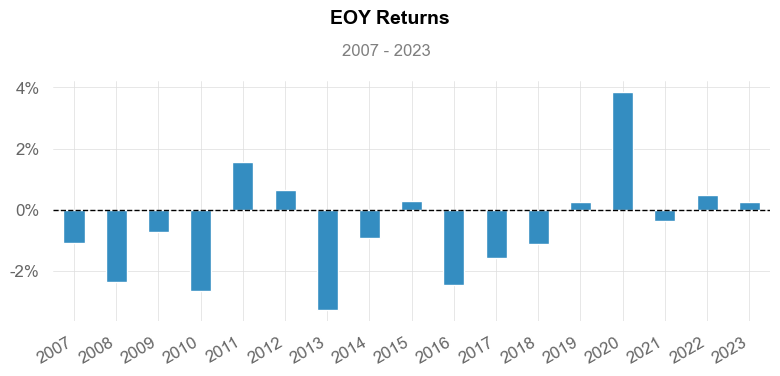

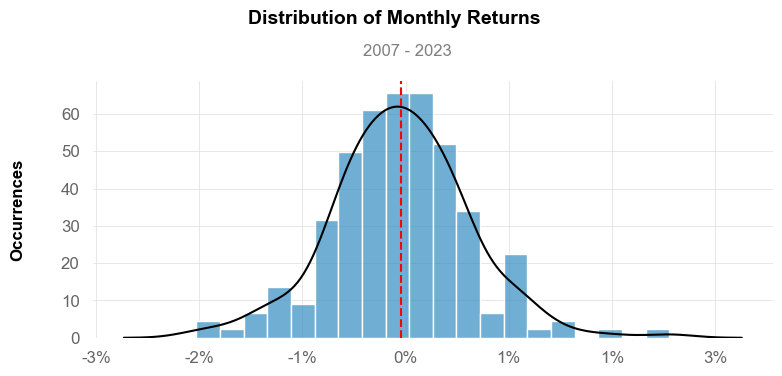

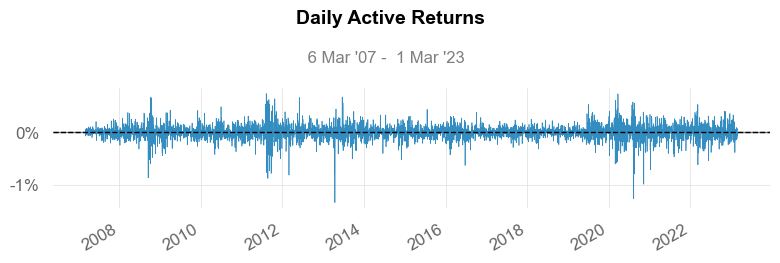

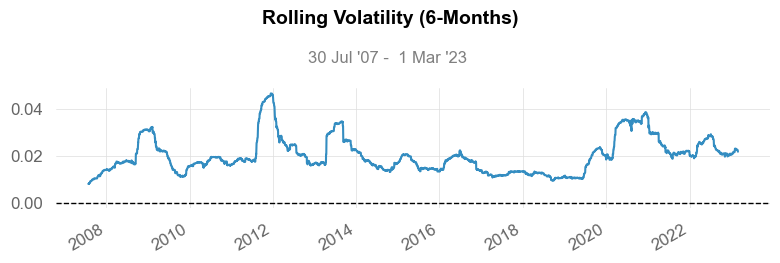

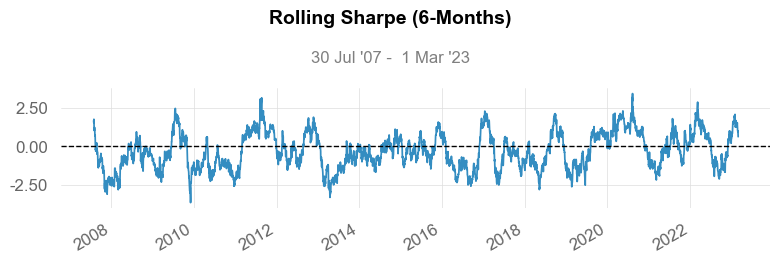

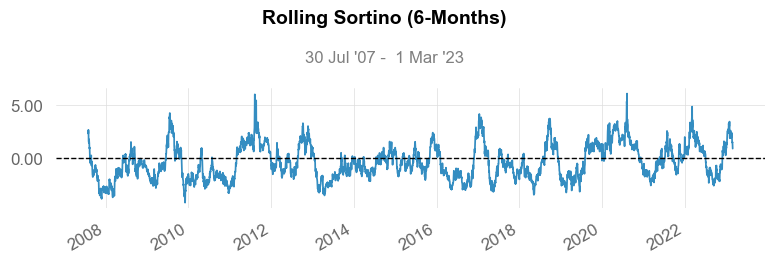

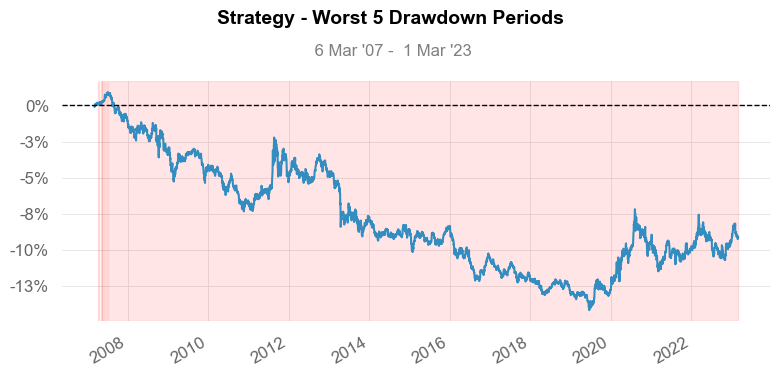

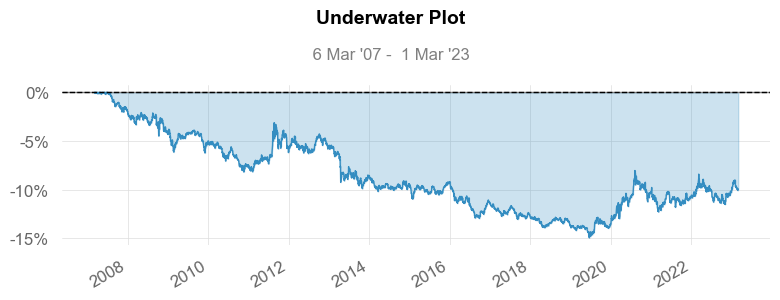

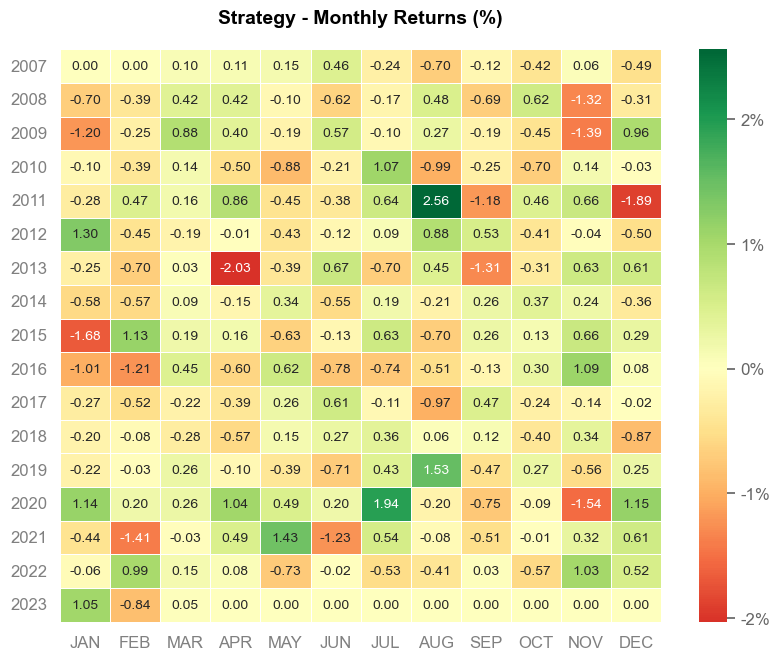

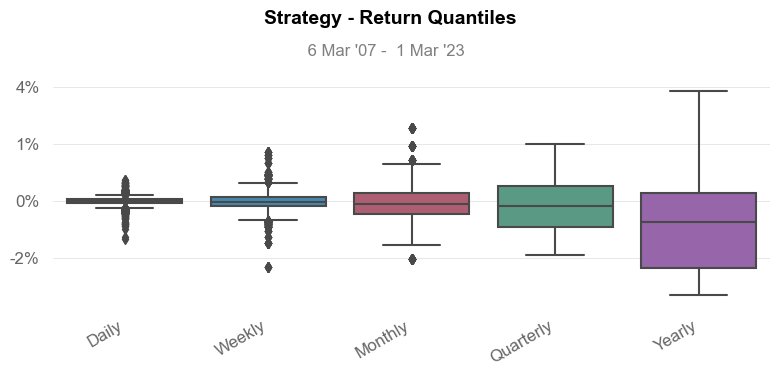

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

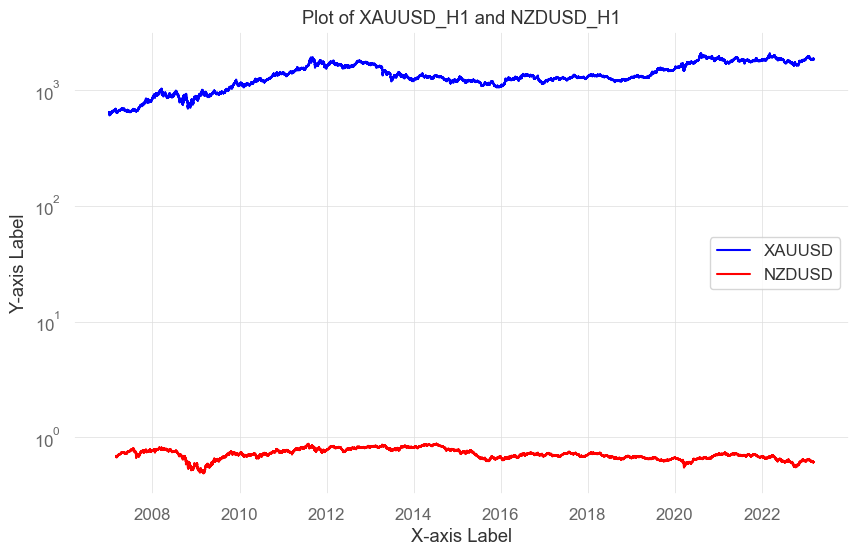

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          1.476e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:16:41   Log-Likelihood:                     -7.2623e+05
No. Observations:               99818   AIC:                                  1.452e+06
Df Residuals:                   99817   BIC:                                  1.452e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1859.6944      1.531   1214.727      0.000    1856.694    1862.695
==============================================================================
Omnibus:                     1434.029   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1181.074
Skew:                           0.198   Prob(JB):                    3.41e-257
Kurtosis:                       2.644   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run()

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.03%
CAGR﹪                     -0.41%

Sharpe                     -0.21
Prob. Sharpe Ratio         16.83%
Smart Sharpe               -0.21
Sortino                    -0.29
Smart Sortino              -0.29
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.91%
Longest DD Days            5718
Volatility (ann.)          2.12%
Calmar                     -0.03
Skew                       -0.7
Kurtosis                   9.38

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.56%
Kelly Criterion            -2.09%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-06,2019-06-19,2023-03-01,5718,-14.905408,-14.272096
2,2007-05-02,2007-05-06,2007-05-13,12,-0.188650,-0.179663
3,2007-06-10,2007-06-17,2007-06-25,16,-0.175735,-0.174147
4,2007-04-03,2007-04-06,2007-04-18,16,-0.125670,-0.117955
5,2007-03-25,2007-03-28,2007-04-01,8,-0.085130,-0.048082


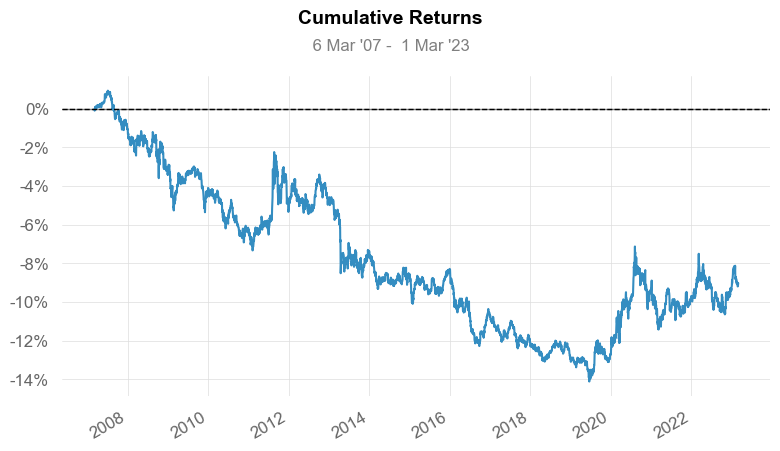

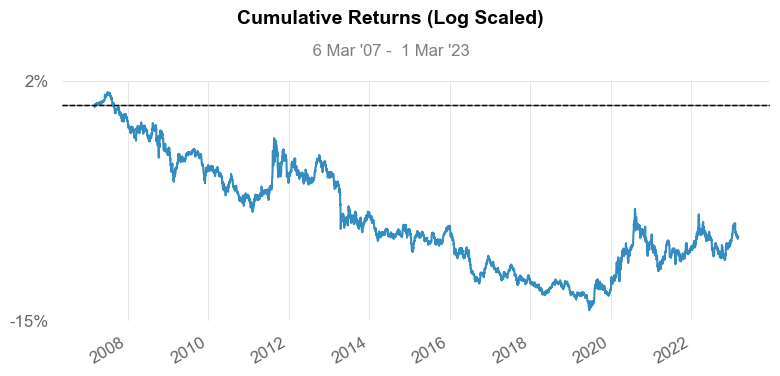

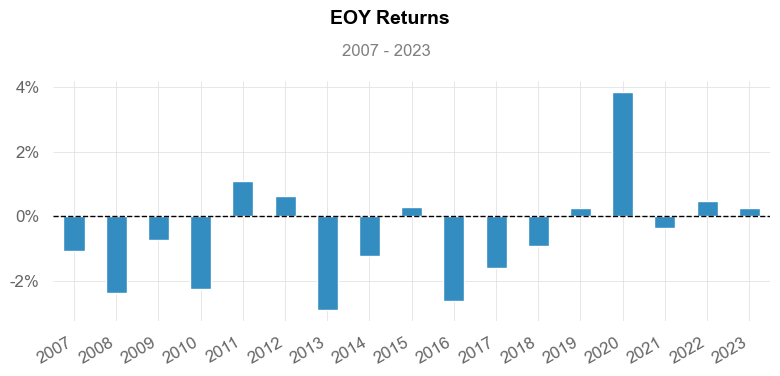

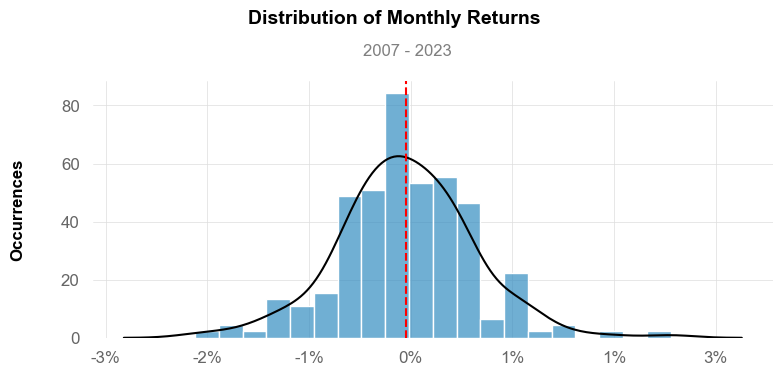

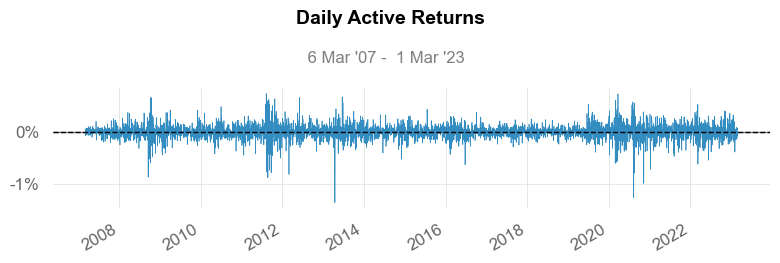

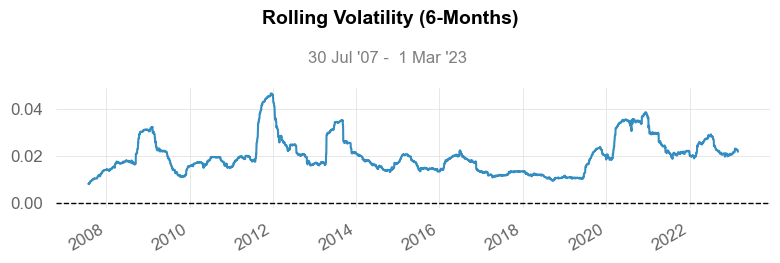

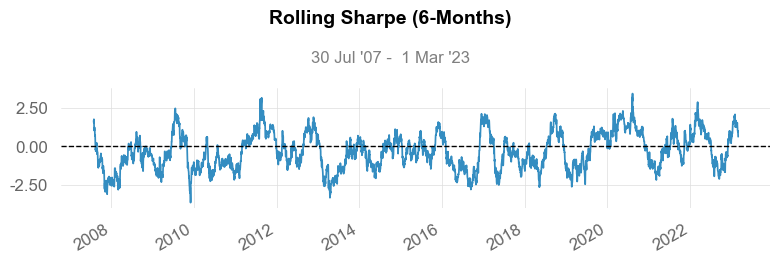

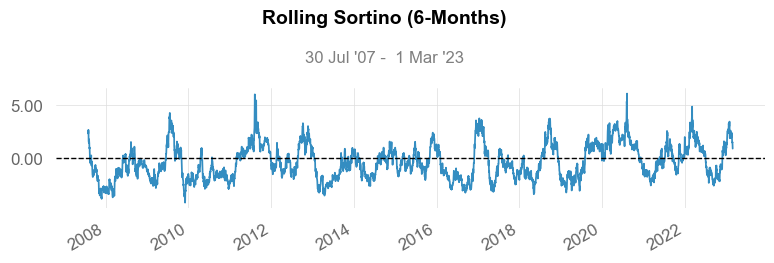

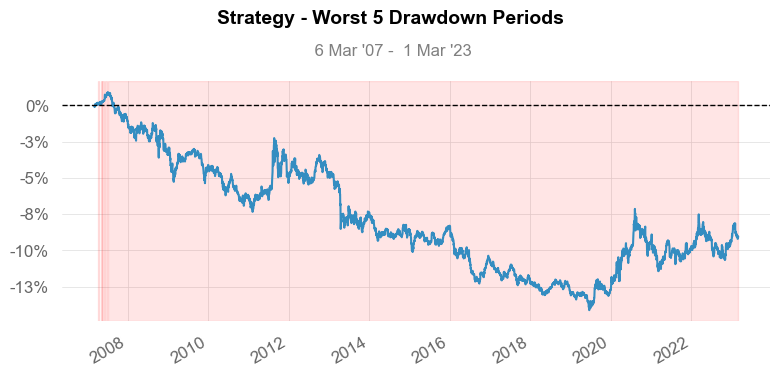

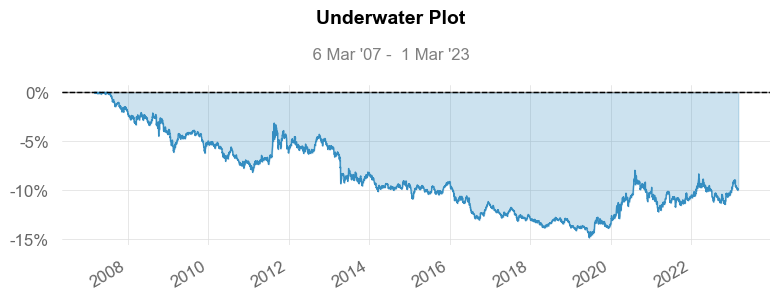

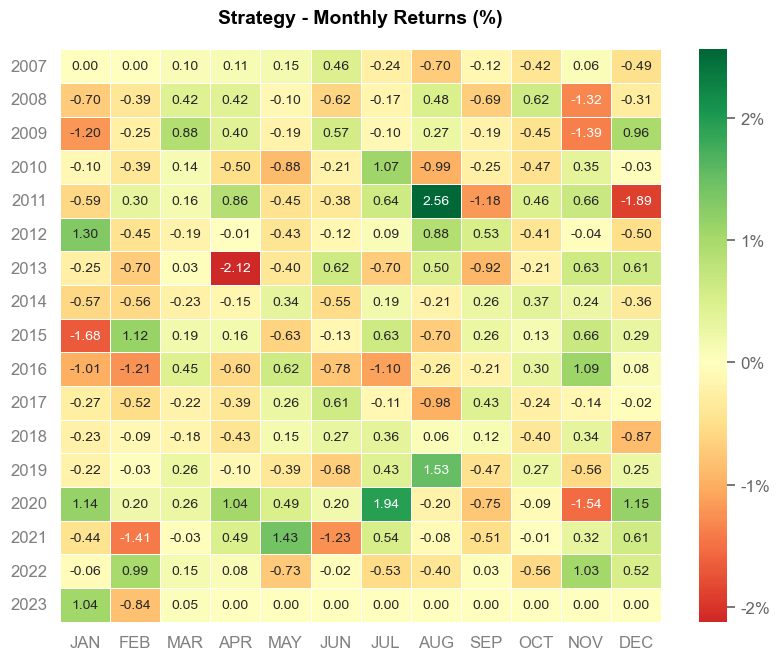

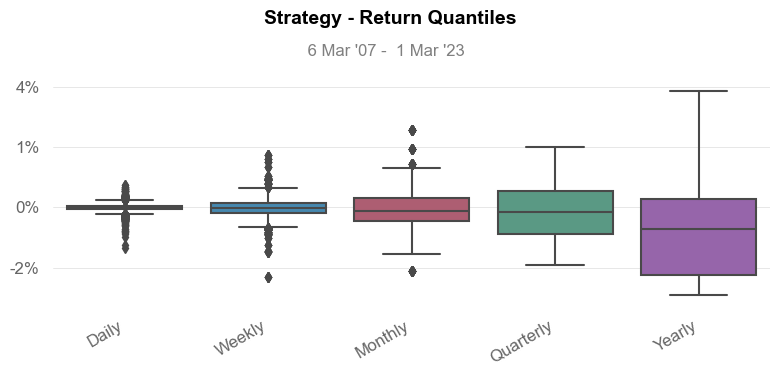

In [40]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

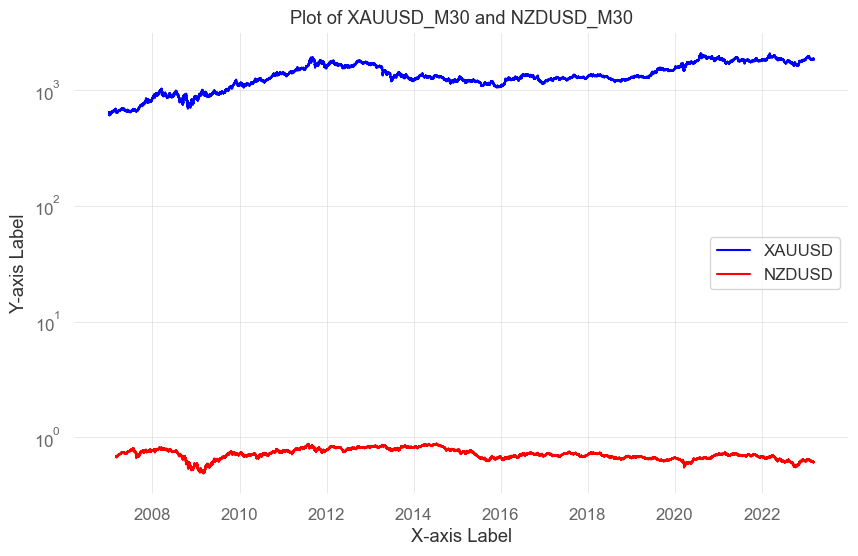

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          2.951e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:21:21   Log-Likelihood:                     -1.4523e+06
No. Observations:              199619   AIC:                                  2.905e+06
Df Residuals:                  199618   BIC:                                  2.905e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1859.6579      1.083   1717.862      0.000    1857.536    1861.780
==============================================================================
Omnibus:                     2867.414   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2361.722
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                       2.644   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run()

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.17%
CAGR﹪                     -0.41%

Sharpe                     -0.22
Prob. Sharpe Ratio         16.46%
Smart Sharpe               -0.22
Sortino                    -0.29
Smart Sortino              -0.29
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -15.05%
Longest DD Days            5718
Volatility (ann.)          2.12%
Calmar                     -0.03
Skew                       -0.76
Kurtosis                   10.26

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.56%
Kelly Criterion            -2.12%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-06,2019-06-18,2023-03-01,5718,-15.053154,-14.423137
2,2007-05-02,2007-05-06,2007-05-13,12,-0.188657,-0.179670
3,2007-06-10,2007-06-17,2007-06-25,16,-0.175742,-0.174154
4,2007-04-03,2007-04-06,2007-04-18,16,-0.125675,-0.117960
5,2007-03-25,2007-03-28,2007-04-01,8,-0.085133,-0.048084


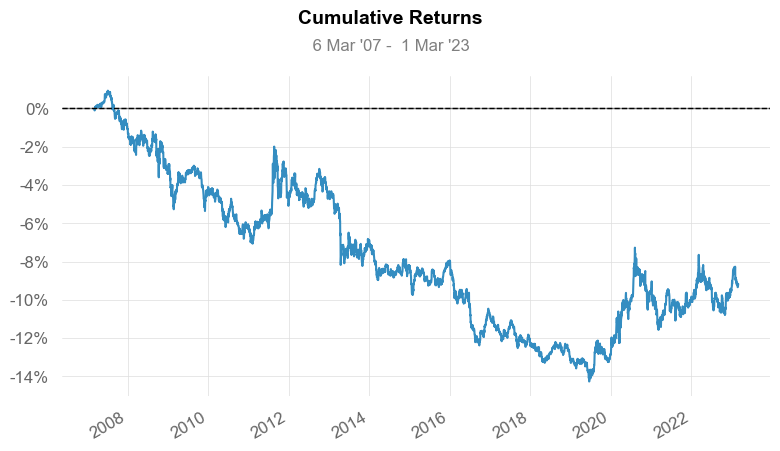

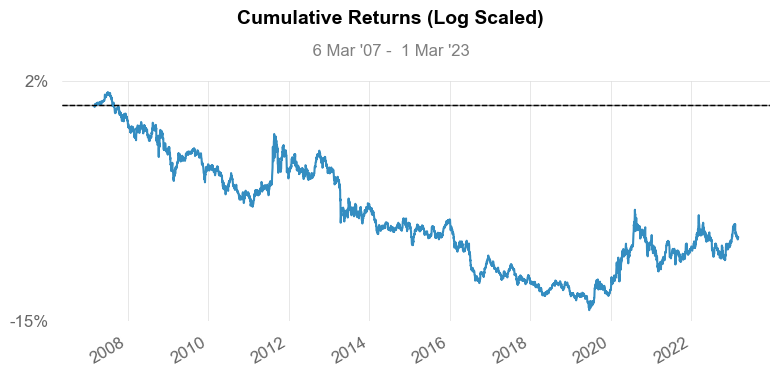

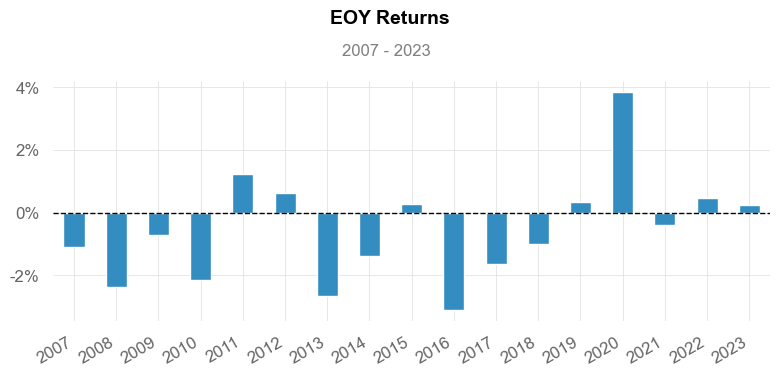

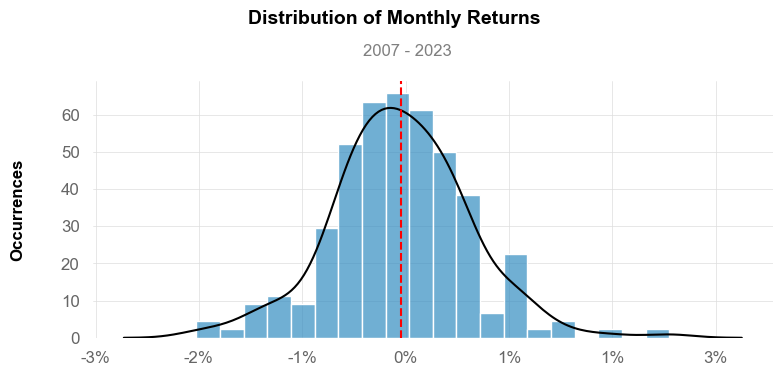

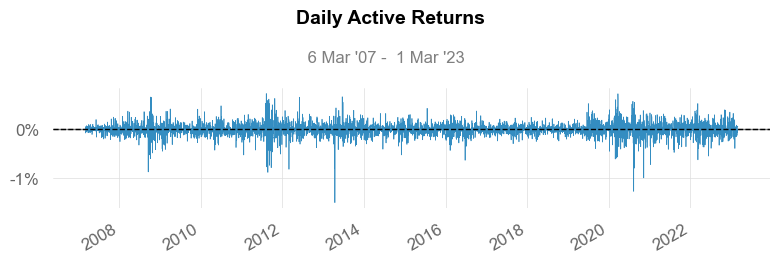

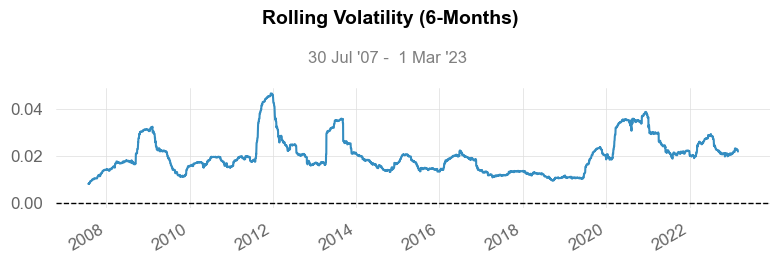

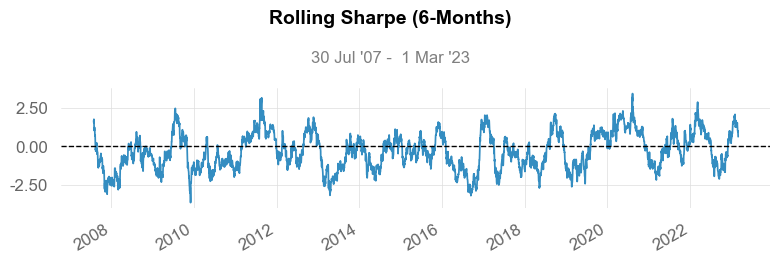

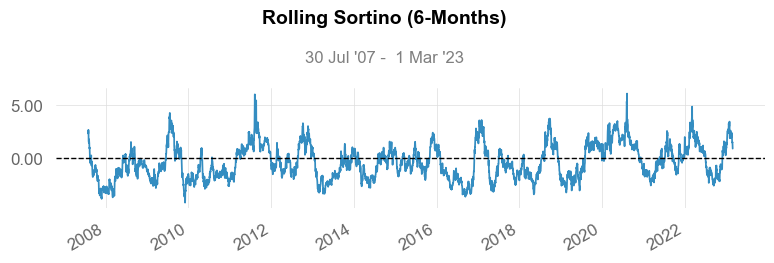

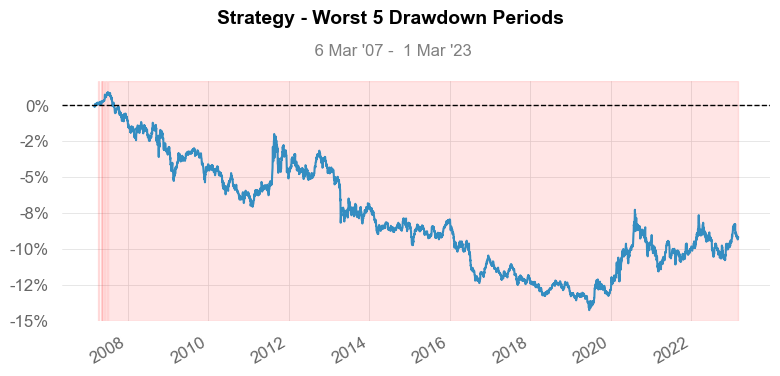

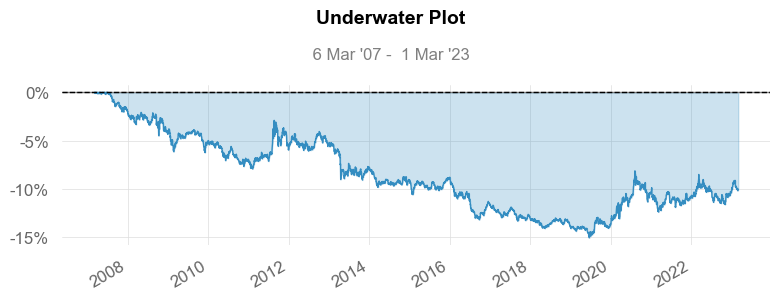

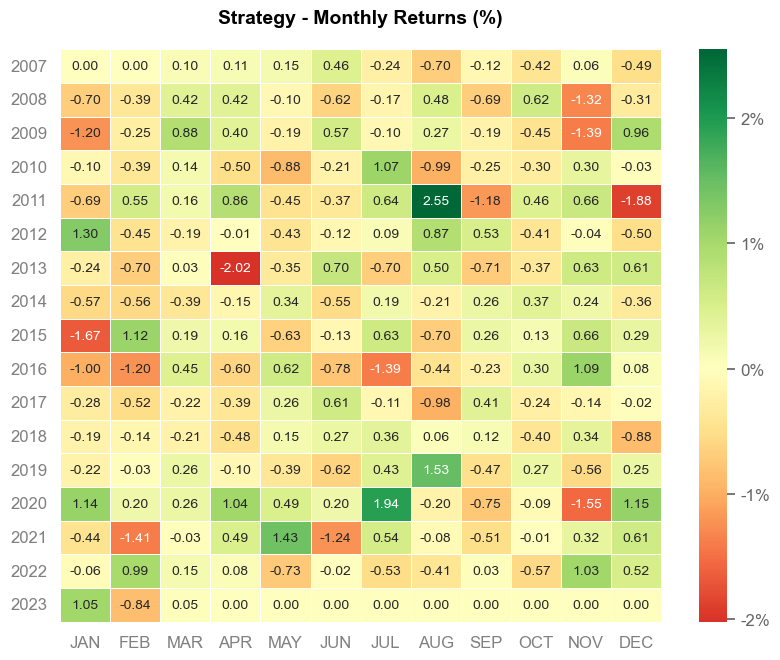

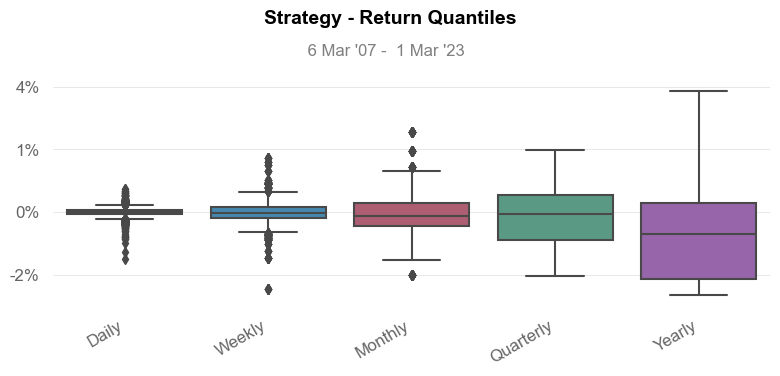

In [51]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())